# Step 8: In Python, produce a nicely formatted and labeled multi-panel plot describing your variants

In [17]:
#Open the file
annot_file = open('/Users/cmdb/qbb2020-answers/Quant_lab/assignment_02/variants/annotated.vcf', 'r')

#initialize list of AF values (allele frequency)
allele_freqs = []
#initialize dictionary for annotations
annots_dict = {}
#initialize list of DP values (read depths)
read_depths = []
#initialize list of GQ values (genotype quality scores)
genotype_quality_scores = []

counter = 0

#go line by line through file
for line in annot_file:
    if '#' in line: #if line is header
        continue
        
    #if counter == 20:
        #break
        
    #print('counter is', counter)
    fields = line.split('\t') #split line by tab
    INFO = fields[7] #save INFO (fields[7]) and FORMAT (fields[last 10]) to variables
    FORMAT = fields[-10:]
    #print('INFO is', INFO)
    #print()
    #print('FORMAT is', FORMAT)
    
    INFO = INFO.split(';') #split INFO by ';'
    #AF = INFO[3] #From splitted INFO, grab float(AF value) and append to list of AF values
    AF = INFO[3][3:]
    #print('AF is:', AF)
    #print(type(AF))
    #float_AF = float(AF)
    #print('float_AF is', float_AF)
    #print(type(float_AF))
    #allele_freqs += float(AF[3:])
    if ',' in AF: #if AF contains multiple values
        freqs = AF.split(',')
        for freq in freqs:
            allele_freqs += [float(freq)]
    else:
        allele_freqs += [float(AF)]
        
    #print('adding this to allele_freqs:', float(AF))
    #print('allele_freqs is', allele_freqs)
    #print()
    
    
    for fastq in FORMAT:
        if '.:.:.:.:.:.:.:.:.' in fastq:
            #print('INFO is', INFO)
            #print('FORMAT is', FORMAT)
            continue
        subvalues = fastq.split(':') #split FORMAT each by ':' for subvalues
        #print('subvalues is', subvalues)
        #print('counter is', counter)
        #NOTE, values in FORMAT may have multiple entries and be delimited by ','
        DP = subvalues[2] #grab int(DP) and append to list of read depths
        if ',' in DP:
            DPs = DP.split(',')
            for vals in DPs:
                read_depths += [int(vals)]
        else:
            read_depths += [int(DP)]
        
            
        GQ = subvalues[1] #grab float(GQ) and append to list of genotype qualities
        if ',' in GQ:
            GQs = GQ.split(',')
            for vals in GQs:
                genotype_quality_scores += [float(vals)]
        else:
            genotype_quality_scores += [float(GQ)]
    
    
    for ANNOTS in INFO:
        
        if "ANN=" in ANNOTS:
            annots = ANNOTS
            break
            
    if "ERROR_CHROMOSOME_NOT_FOUND" in annots:
        continue
    
    #annots = INFO[-1] #From splitted INFO, grab last value
    annots = annots.split('|') #split by '|'
    #print('annots is', annots)
        
    annotation = annots[1] #grab annotation (annots[1])
    #if "Y" in annotation:
        #print('INFO is', INFO)
        #print('annots is', annots)
        #print('annotation is', annotation)
        #print('count is', counter)
    #if annotation == "":
        #print('INFO is', INFO)
        #print('annotation is empty string')
        #print('annots is', annots)
    #print('annotation is', annotation)
    #add to annotation dictionary (key is annotation, value is number of times that annotation occurs)
    annots_dict.setdefault(annotation, 0)
    annots_dict[annotation] += 1

    counter += 1
    #print('~~~~~')
    #print('~~~~~')
    #print()
        
print(annots_dict)


{'upstream_gene_variant': 16318, 'synonymous_variant': 15605, 'missense_variant': 9369, 'stop_gained': 75, 'splice_region_variant&intron_variant': 11, 'stop_lost&splice_region_variant': 17, 'frameshift_variant': 151, 'frameshift_variant&stop_lost&splice_region_variant': 3, 'disruptive_inframe_deletion': 21, 'downstream_gene_variant': 226, 'disruptive_inframe_insertion': 9, 'conservative_inframe_insertion': 9, 'stop_lost': 12, 'splice_region_variant&stop_retained_variant': 26, 'stop_retained_variant': 2, 'initiator_codon_variant': 1, 'start_lost': 18, 'conservative_inframe_deletion': 6, 'splice_region_variant&non_coding_transcript_exon_variant': 1, 'frameshift_variant&start_lost': 4, 'splice_donor_variant&intron_variant': 1, 'frameshift_variant&splice_region_variant': 1, 'splice_acceptor_variant&intron_variant': 1, 'splice_region_variant&synonymous_variant': 2, 'start_lost&conservative_inframe_insertion': 1, 'missense_variant&splice_region_variant': 1, 'frameshift_variant&stop_gained': 

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


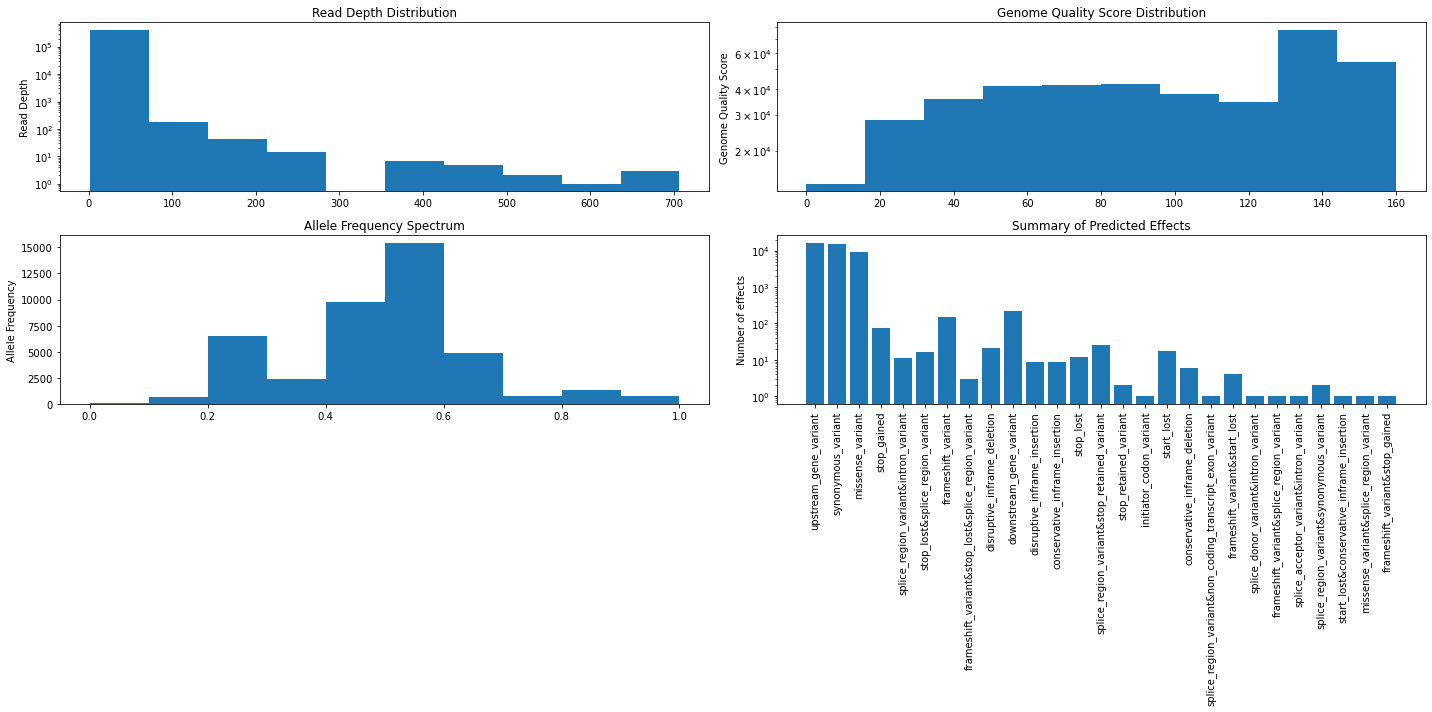

In [47]:
#plotting

#Make a multiplot with:
#Subplot 1: histogram of read depth distribution (read_depths)
#Subplot 2: histogram of quality distribution (genotype_quality_scores)
#Subplot 3: histogram of allele frequency spectrum (allele_freqs)
#Subplot 4: barplot summary of the predicted effect(s) of each variant (annots_dict)

import matplotlib.pyplot as plt
import pandas as pd 

annots_series = pd.Series(annots_dict)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0,0].hist(x = read_depths, log=True)
axes[0,0].set_ylabel("Read Depth")
axes[0,0].set_title("Read Depth Distribution")

axes[0, 1].hist(x = genotype_quality_scores, log=True)
axes[0, 1].set_ylabel("Genome Quality Score")
axes[0, 1].set_title("Genome Quality Score Distribution")

axes[1, 0].hist(x = allele_freqs)
axes[1, 0].set_ylabel("Allele Frequency")
axes[1, 0].set_title("Allele Frequency Spectrum")

axes[1, 1].bar(annots_dict.keys(), annots_dict.values())
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("Summary of Predicted Effects")
axes[1, 1].set_ylabel("Number of effects")
axes[1, 1].set_xticklabels(annots_dict.keys(), rotation='vertical')

fig.tight_layout()
fig.show()